# Basic matrix operations in `numpy`

**Learning goal:** By the end of this case you will be familiar with the `numpy` library, `numpy` arrays, and some basic array manipulation tasks.

An important part of your data training relies on having a good understanding of how you can manipulate data structures and perform mathematical operations with them. We have already seen Python's native data structures (sets, lists, tuples, dictionaries), but today we will guide you through another one that is very convenient in a lot of use cases. This new structure is the **`array`**. This one is not supported out-of-the-box and requires using an external **library** called `numpy` (short for "numeric Python"); however, this line is trivial to **import**. You just have to run this line:

In [8]:
import numpy as np

We've just imported the `numpy` library and assigned an **alias** (in this case, `np`) to it. Thanks to this alias, whenever we need to call a `numpy` function, we don't have to type `numpy.some_function()` but we can use `np.some_function()`instead. `numpy` and its associated libraries are extremely popular in data science and are used by many data practitioners around the world every day.

## Creating arrays

In many ways, `numpy` arrays are like Python lists. The main advantages of using arrays over lists are improved performance and an easier syntax when doing mathematical operations that involve several of them.

This is how you create an array of integers in `numpy`:

In [3]:
np.array([1,2,3,4], dtype=np.int64)

array([1, 2, 3, 4], dtype=int64)

And this is how you create it specifying the data type as floating point (decimal numbers) instead of integers:

In [4]:
np.array([1,2,3,4], dtype=np.float64)

array([1., 2., 3., 4.])

You can see that the first array stored the elements as integers, while the second one stored them as decimal numbers. Here's an array of text elements:

In [5]:
np.array(["Once", "in", "a", "blue", "moon"], dtype=str)

array(['Once', 'in', 'a', 'blue', 'moon'], dtype='<U4')

And this is one of boolean elements:

In [6]:
np.array([True, False, False, False, True], dtype=bool)

array([ True, False, False, False,  True])

### Exercise 1

Create this array:
$$
\begin{bmatrix}
25.7521 & 45.11112 & 50
\end{bmatrix}
$$

**Answer.**

In [7]:
np.array([25.7521,45.11112,50],dtype=float)

array([25.7521 , 45.11112, 50.     ])

You can paste multiple arrays together to make a single combined array that can be thought of as a table with rows and columns. For instance, these three arrays:

In [ ]:
np.array([99, 112, 44], dtype=np.float64)
np.array([7.89, 1.74, 22.3], dtype=np.float64)
np.array([9.879, 4.71, 3.22], dtype=np.float64)

Can be made into a table like this:

In [8]:
table = np.array([
    [99, 112, 44],
    [7.89, 1.74, 22.3],
    [9.879, 4.71, 3.22]
])
table

array([[ 99.   , 112.   ,  44.   ],
       [  7.89 ,   1.74 ,  22.3  ],
       [  9.879,   4.71 ,   3.22 ]])

You can take a look at the shape of this array by accessing the **`.shape`** attribute:

In [9]:
table.shape

(3, 3)

This output means that `table` has three elements in each one of its three sub-arrays.

### Exercise 2

Create this array:

$$
\begin{bmatrix}
1 & 2 & 3 & 4 \\
5 & 6 & 7 & 8 \\
9 & 10 & 11 & 12 \\
\end{bmatrix}
$$

**Answer.**

-------

### Exercise 3

Create this array:

$$
\begin{bmatrix}
[1 & 4] & [7 & 10] \\
[3 & 6] & [9 & 12] \\
\end{bmatrix}
$$

**Answer.**

-------

To access elements from an array, you index it as you would a nested list:

In [ ]:
table

In [ ]:
table[0]

In [ ]:
table[1]

In [ ]:
table[1][2]

## Matrix arithmetic

Just as with "normal" numbers, you can do math on arrays. From here on in, we'll refer to arrays as **matrices**, which are 2-dimensional representations of arrays (with rows and columns).

### Matrix addition and subtraction

Let $A$ and $B$ be two matrices such that

$$
A = \begin{bmatrix}
1 & 2 & 3 \\
10 & 20 & 30
\end{bmatrix}
$$

and

$$
B = \begin{bmatrix}
4 & 8 & 16 \\
3 & 9 & 27
\end{bmatrix}
$$

Two matrices must have the same shape in order to be added together. Their sum would be equal to the sum of each element in $A$ with the element that is exactly in the same location (same indexes) in $B$:

$$
A + B = \begin{bmatrix}
1+4 & 2+8 & 3+16 \\
10+3 & 20+9 & 30+27
\end{bmatrix} = \begin{bmatrix}
5 & 10 & 19 \\
13 & 29 & 57
\end{bmatrix}
$$

Adding two matrices in `numpy` is easy:

In [ ]:
A = np.array([
    [1,2,3],
    [10,20,30]
])

B = np.array([
    [4,8,16],
    [3,9,27]
])

A + B

Doing this same addition using just Python lists would have required us to write [some complicated for loops](https://www.geeksforgeeks.org/python-program-add-two-matrices/). We love tools that make our lives easier, and `numpy` arrays do exactly that.

### Exercise 4

Can you guess how to subtract $B$ from $A$ in `numpy`?

**Answer.**

-------

### Scalar multiplication

You can multiply a matrix and a real number together (this real number is referred to as a **scalar**). For instance,

$$
A = \begin{bmatrix}
1 & 2 & 3 \\
10 & 20 & 30
\end{bmatrix}
$$

if multiplied by $5$ would yield

$$
5 \cdot A = \begin{bmatrix}
5 \times 1 & 5 \times 2 & 5 \times 3 \\
5 \times 10 & 5 \times 20 & 5 \times 30
\end{bmatrix}= \begin{bmatrix}
5 & 10 & 15 \\
50 & 100 & 150
\end{bmatrix}
$$


### Exercise 5

Can you guess how to get $5 \cdot A$ in `numpy`?

**Answer.**

-------

### Linear combinations

You can **linearly combine** two matrices by using matrix addition *and* scalar multiplication at the same time. Mathematically, this is the formula for a linear combination of $A$ and $B$:

$$\alpha \cdot A + (1 - \alpha) \cdot B$$

where $\alpha$ is a scalar.

This can be a little bit difficult to visualize using only matrices with numbers. Let's use a pair of images instead, taking advantage of the fact that 2D images are simply matrices in which each element tells you the color of the corresponding pixel.

Let's first import a library that we need in order to import the images into Jupyter and display them inline:

In [1]:
from PIL import Image # The library is PIL. We import a module from that library. The module is Image.

And now let's load two images:

In [3]:
A = Image.open("untitled Folder/macaw.jpg", "r") # "r" stands for "read"
B = Image.open("untitled Folder/tigers.jpg", "r")

This is image `A`:

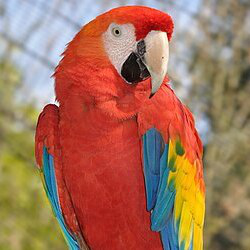

In [4]:
A

And this is image `B`:

In [6]:
type(A)

PIL.JpegImagePlugin.JpegImageFile

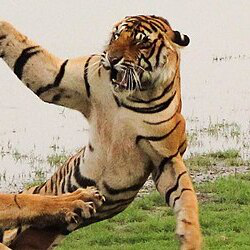

In [5]:
B

Let's now convert both images to `numpy` arrays and inspect their shapes.

In [9]:
A_array = np.asarray(A)
B_array = np.asarray(B)
A_array

array([[[172, 181, 196],
        [166, 178, 194],
        [162, 173, 191],
        ...,
        [124, 123, 118],
        [119, 119, 111],
        [119, 116, 109]],

       [[167, 176, 191],
        [165, 174, 189],
        [161, 172, 190],
        ...,
        [118, 118, 110],
        [116, 116, 108],
        [116, 113, 104]],

       [[163, 171, 184],
        [160, 170, 182],
        [161, 170, 187],
        ...,
        [110, 110, 100],
        [114, 111, 102],
        [113, 110, 101]],

       ...,

       [[130, 130,  42],
        [134, 134,  46],
        [139, 139,  51],
        ...,
        [132, 115,  71],
        [135, 119,  70],
        [138, 120,  70]],

       [[131, 131,  41],
        [132, 132,  42],
        [136, 136,  46],
        ...,
        [127, 110,  66],
        [134, 118,  69],
        [131, 113,  63]],

       [[129, 133,  39],
        [130, 134,  40],
        [134, 138,  44],
        ...,
        [128, 111,  65],
        [134, 116,  68],
        [128, 110,  62]]

In [39]:
B_array

array([[[223, 223, 215],
        [223, 223, 215],
        [223, 223, 215],
        ...,
        [228, 221, 215],
        [228, 221, 215],
        [228, 221, 215]],

       [[224, 224, 216],
        [224, 224, 216],
        [223, 223, 215],
        ...,
        [230, 223, 215],
        [229, 222, 214],
        [229, 222, 214]],

       [[224, 224, 216],
        [223, 223, 215],
        [222, 222, 214],
        ...,
        [230, 223, 215],
        [231, 224, 216],
        [231, 224, 216]],

       ...,

       [[183, 132,  66],
        [201, 150,  84],
        [207, 158,  92],
        ...,
        [139, 164,  72],
        [134, 157,  66],
        [132, 155,  64]],

       [[191, 135,  78],
        [200, 145,  88],
        [202, 150,  92],
        ...,
        [135, 160,  66],
        [123, 147,  53],
        [125, 149,  55]],

       [[199, 138,  93],
        [207, 149, 101],
        [204, 148,  97],
        ...,
        [121, 146,  52],
        [120, 144,  50],
        [121, 145,  51]]

### Question

Why do you think each element in this array has three integers inside?


**Answer.** Pixels are made up of three colors: Red, Green, and Blue (the RGB standard). Therefore, each element in the array (each pixel) has one number for red, one number for green, and one number for blue. It is the combination of these three primary colors which creates all the colors we see on our screens.

Now let's view the shapes of the arrays:

In [16]:
print(A_array.shape)
print(B_array.shape)

(250, 250, 3)
(250, 250, 3)


Both images are 250 x 250 pixels in size and have three color channels (RGB).

### Exercise 6

Create a function that takes two matrices and one scalar as arguments and outputs the linear combination of the matrices. Call it `linear_combination`.

**Note:** We will be plotting the linear combinations that this function will generate. For technical reasons related to how images are handled under the hood, Python requires that the result of `linear_combinations` is of a `np.uint8` data type. To convert an array `a` into this data type you simply run `a = a.astype(np.uint8)`.

In [32]:
# 𝛼⋅𝐴+(1−𝛼)⋅𝐵
def linear_combination(A,B,alpha):
    result = (np.dot(alpha,A) +np.dot((1-alpha),B))
    return result
    

In [31]:
np.dot(A_array,0.5) + np.dot(B_array,1-0.5) 

array([[[197.5, 202. , 205.5],
        [194.5, 200.5, 204.5],
        [192.5, 198. , 203. ],
        ...,
        [176. , 172. , 166.5],
        [173.5, 170. , 163. ],
        [173.5, 168.5, 162. ]],

       [[195.5, 200. , 203.5],
        [194.5, 199. , 202.5],
        [192. , 197.5, 202.5],
        ...,
        [174. , 170.5, 162.5],
        [172.5, 169. , 161. ],
        [172.5, 167.5, 159. ]],

       [[193.5, 197.5, 200. ],
        [191.5, 196.5, 198.5],
        [191.5, 196. , 200.5],
        ...,
        [170. , 166.5, 157.5],
        [172.5, 167.5, 159. ],
        [172. , 167. , 158.5]],

       ...,

       [[156.5, 131. ,  54. ],
        [167.5, 142. ,  65. ],
        [173. , 148.5,  71.5],
        ...,
        [135.5, 139.5,  71.5],
        [134.5, 138. ,  68. ],
        [135. , 137.5,  67. ]],

       [[161. , 133. ,  59.5],
        [166. , 138.5,  65. ],
        [169. , 143. ,  69. ],
        ...,
        [131. , 135. ,  66. ],
        [128.5, 132.5,  61. ],
        [128. ,

-------

Let's now linearly combine `A_array` and `B_array` using $\alpha=0.5$:

In [36]:
lin_AB_array = linear_combination(A_array, B_array, 0.5)
lin_AB_array

array([[[197.5, 202. , 205.5],
        [194.5, 200.5, 204.5],
        [192.5, 198. , 203. ],
        ...,
        [176. , 172. , 166.5],
        [173.5, 170. , 163. ],
        [173.5, 168.5, 162. ]],

       [[195.5, 200. , 203.5],
        [194.5, 199. , 202.5],
        [192. , 197.5, 202.5],
        ...,
        [174. , 170.5, 162.5],
        [172.5, 169. , 161. ],
        [172.5, 167.5, 159. ]],

       [[193.5, 197.5, 200. ],
        [191.5, 196.5, 198.5],
        [191.5, 196. , 200.5],
        ...,
        [170. , 166.5, 157.5],
        [172.5, 167.5, 159. ],
        [172. , 167. , 158.5]],

       ...,

       [[156.5, 131. ,  54. ],
        [167.5, 142. ,  65. ],
        [173. , 148.5,  71.5],
        ...,
        [135.5, 139.5,  71.5],
        [134.5, 138. ,  68. ],
        [135. , 137.5,  67. ]],

       [[161. , 133. ,  59.5],
        [166. , 138.5,  65. ],
        [169. , 143. ,  69. ],
        ...,
        [131. , 135. ,  66. ],
        [128.5, 132.5,  61. ],
        [128. ,

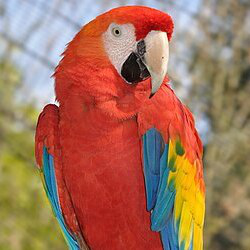

In [38]:
Image.fromarray(A_array)

Image.fromarray(B_array)

In [40]:
Image.fromarray(
    lin_AB_array
)

TypeError: Cannot handle this data type: (1, 1, 3), <f8

So you can see that a linear combination does actually combine both matrices. It has combined our macaw and our tiger in a single image! And even better, you can control the amount of each image that will end up in the mixed version. This one, for instance, used $\alpha=0.5$, which means that both images were mixed in equal parts.

### Exercise 7

Calculate and display the linear combination of the photos with:

* $\alpha = 0$
* $\alpha = 1$
* $\alpha = 0.25$
* $\alpha = 0.75$

**Answer.**

-------

This is great. Now you know how film makers create fade-ins and fade-outs! They simply linearly vary the amount of each image in each succesive frame using the parameter $\alpha$.

You can *slice* these arrays as well. To slice an array, you use a syntax similar to the one you use when you slice a list. You use positional indexes between brackets, like this: `my_array[6]`. Since `numpy` is zero-indexed, this example would get you the item that is in the seventh position in the array `my_array`. If you have nested arrays, you can do multiple indexing like this: `my_array[6][3]`. This code would get you the fourth element of the seventh sub-array of `my_array`.

Additionally, you can use `:` to tell `numpy` to return all the elements in an array. Thus, `my_array[:]` is the same as `my_array`, and `my_array[6][:]` is the same as `my_array[6]`. This shortcut becomes more useful when you need to access all the <i>n</i>-th elements of all the sub-arrays. For instance, `my_array[:, 4]` will get you *all* the fifth elements of *all* the sub-arrays of `A`. Notice that this is *different* from `my_array[:][4]`, which first retrieves all the elements of `my_array` and then *only* the fifth element of the result.

To slice using ranges of positions, you use `my_array[start_range:end_range]`, and so `my_array[3:7]` would retrieve the elements of `my_array` that are between those positions.

Let's slice our photos:

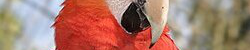

In [41]:
Image.fromarray(
    A_array[50:100, :] # Slice vertically, show all pixels horizontally
)

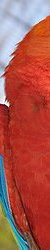

In [42]:
Image.fromarray(
    A_array[: ,50:100] # Show all pixels vertically, then slice horizontally
)

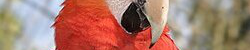

In [43]:
Image.fromarray(
    A_array[:][50:100]
)

### Exercise 8

Slice the tiger photo to crop it to 200 x 200 pixels (you need to remove 25 pixels from each border).

**Answer.**

-------

### Other useful operations

We can extract just the red component of an image by doing some clever slicing (here the reddest parts of the image are shown as the brightest - since we got rid of the G and B channels, we're not in the RGB standard anymore and therefore Python interprets this as a greyscale image):

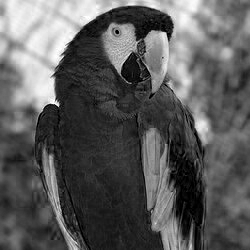

In [46]:
Image.fromarray(
    # The first ":" means "Take all the pixels from the first dimension (height)"
    # The second ":" means: "Take all the pixels from the second dimension (width)"
    # The 0 means "Take only the red channel (the first color value - index 0)"
    # Try with 1 (green) or 2 (blue) instead and see what happens
    A_array[:, :, 2]
)

We can also add random noise using `numpy`'s random number generation function **`np.random.rand()`** and matrix addition. `np.random.rand()` produces a random float number between 0 and 1:

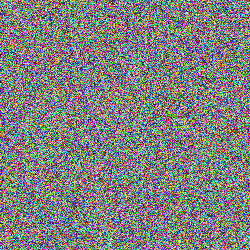

In [47]:
random_noise = np.random.rand(250,250,3)  # 250 x 250 pixels, 3 color channels
random_noise = random_noise * 255 # Multiply the noise matrix by a scalar to make the noise more noticeable

A_noisy = A_array + random_noise # This is matrix addition!
A_noisy = A_noisy.astype(np.uint8) # Converting to the required data type

Image.fromarray(
        A_noisy
)

Looks like the random noise image you would see on television channels that you didn't have access to as a kid!

### Exercise 9

Adapt the code from the previous cell to create a function that adds noise to an image in proportion to some user-defined scalar. Call it `add_random_noise`.

**Answer.**

-------

Now we can parametrize our noise addition:

In [48]:
Image.fromarray(
        add_random_noise(A_array, 100) # Try with different values!
)

NameError: name 'add_random_noise' is not defined

**Note:** A common application of `numpy` is random number generation between two integers. You can use this code to generate a random number between 4 and 15, for instance:

In [50]:
np.random.randint(4,15) # Run this cell several times to see how the output changes at random

8

In the RGB standard, `(0,0,0)` is the color black, and `(255,255,255)` is the color white. All the other colors are created by varying the channel values within those limits. We can create arrays of black images, for instance, by telling numpy to generate a matrix with all its values set to zero. For this we use **`np.full()`**:

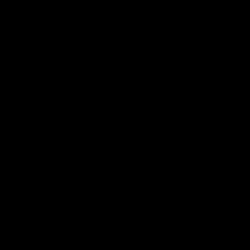

In [51]:
black = np.full(shape=(250,250,3), fill_value=0)
black = black.astype(np.uint8)

Image.fromarray(
        black
)

Blue is `(0,0,255)`. We can create and display a blue square of 250 x 250 pixels by first creating a black square and then replacing its blue channel with the integer `255`:

In [52]:
blue = black.copy()
blue[:, :, 2] = 255
blue

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]

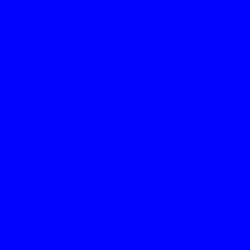

In [53]:
Image.fromarray(
        blue
)

### Exercise 10

Create a red square and linearly combine it with the blue square we've just created. Use $\alpha=0.3$ and $\alpha=0.6$.

**Hint:** Red in the RGB standard is `(255,0,0)`.


**Answer.**

-------

## Appendix

This is a summary of the operations we covered in this case.

* **Creating arrays**: `np.array(list_or_lists_of_elements, dtype=a_dtype)`. There are [several data types in `numpy`](https://numpy.org/devdocs/user/basics.types.html), but the ones we used here were `np.int64`, `np.float64`, `np.uint8`, `str`, and `boolean`.
* **Matrix addition**: `A + B`, where `A` and `B` are `numpy` arrays.
* **Matrix subtraction**: `A - B`, where `A` and `B` are `numpy` arrays.
* **Multiplication of a scalar and a matrix**: `r * A`, where `r` is a real number (a scalar) and `A` is a `numpy` array.
* **Converting an image to a `numpy` array**: `np.asarray(I)` where `I` is a [Pillow image object](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.open).
* **Showing the shape of a `numpy` array**. `A.shape` where `A` is a `numpy` array. Remember that the shape of an array is the number of elements it has in each one of its sub-arrays.
* **Slicing a `numpy` array:** For the most part, it is just like slicing lists, with the added benefit that you can use the `:` operator to retrieve all the elements in a subset of the array. For more information, you can find a tutorial [here](https://www.w3schools.com/python/numpy_array_slicing.asp).
* **Converting an array to another data type**: `A.astype(data_type)`, where `A` is a `numpy` array.
* **Creating an array of random numbers between 0 and 1:** `np.random.rand(shape)`. For instance, `np.random.rand(250,250,3)` will create a matrix of 250 x 250 in which element is itself an array that has 3 elements.
* **Generating a random integer between two integers:** `np.random.randint(lower_boundary,upper_boundary)`.
* **Creating a matrix and filling it with a given number:** `np.full(shape, fill_value)`. For instance, `np.full(shape=(25,25), fill_value=0)` will create a 25x25 array full of zeroes.
* **Creating a copy of an array:** `A.copy()` where `A` is a `numpy` array.


There are lots of applications of matrices and `numpy` offers a treasure trove of functions to make them possible. Image processing is just one of those applications. We encourage you to learn more about `numpy` in its [documentation](https://numpy.org/doc/stable/user/quickstart.html).

## Attribution

*Ara macao - Scarlet Ara*. Quartl. October 9, 2011. Creative Commons Attribution-Share Alike 3.0 Unported license. https://commons.wikimedia.org/wiki/File:Ara_macao_qtl1.jpg

*The two female cubs of T-19 in a playful mood at Ranthambore tiger reserve*. Vedang Vadalkar. June 18, 2015. Creative Commons Attribution-Share Alike 4.0 International license. https://commons.wikimedia.org/wiki/File:Flying_Princess_(cropped).jpg